In [2]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
# Read in the data stored in various files into different pandas dataframes
# For the purposes of this projects, only 5 dataframes are relevant. The dataframe NOT relevant is df_order_products_train
df_aisles = pd.read_csv("./csv_files/aisles.csv")
df_departments = pd.read_csv("./csv_files/departments.csv")
df_orders = pd.read_csv("./csv_files/orders.csv")
df_products = pd.read_csv("./csv_files/products.csv")
df_order_products_prior = pd.read_csv("./csv_files/order_products__prior.csv")
df_order_products_train = pd.read_csv("./csv_files/order_products__train.csv")


**Data cleaning/wrangling**

In [5]:
# Look at structure of each dataframe
print('Orders:')
print(df_orders.info(), '\n')
print('Order products prior:')
print(df_order_products_prior.info(), '\n')
print('Products:')
print(df_products.info(), '\n')
print('Aisles:')
print(df_aisles.info(), '\n')
print('Departments:')
print(df_departments.info(), '\n')

Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None 

Order products prior:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB
None 

Products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 colum

In [6]:
#Based on results above, all dataframes have non-null values except for df_orders and df_order_products_prior. 
# Check for null values for these two dataframes
df_orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [7]:
# Check for null values
df_order_products_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

From results above, the dataframe df_orders has null or NaN values in its "days_since_prior_order" column which would need to be treated.



In [8]:
# Remove rows containing NaN values for column "days_since_prior_order" since this was the only column with NaN values
df_orders_clean = df_orders.dropna(subset = ["days_since_prior_order"])

In [9]:
#Check to see that NaN values were removed
df_orders_clean.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [10]:
df_orders.order_id.nunique()

3421083

In [11]:
# Look at summary stats for dataframes
print('Orders:')
df_orders.describe()

Orders:


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


From results above, min and max values for all the columns seem reasonable. There are no outliers or bad/incorrect data points that need to be treated.

1. order_id : goes from 1 to about 3.4M
2. user id : goes from 1 to about 200K
3. order_number : goes from 1 to about 100 which seems reasonable (a user can have made upto 100 orders to instacart in his/her history)
4. order_dow : goes from 0 to 6 which is resonable ( day of the week for order can have any of the 7 possible values)
5. order_hour_of_day : goes from 0 to 23 which is reasonable (hour of the day for order can have any of the 24 possible values)
6. days_since_prior_order : goes from 0 to 30 which is reasonable (days since user last made the order can have any of the 31 possible values)

In [12]:
print('Order products prior:')
df_order_products_prior.describe()

Order products prior:


,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


From results above, min and max values for all columns seem reasonable. There are no outliers or bad/incorrect data points that need to be treated:

  1. product_id : goes from 1 to about 49K which is reasonable (it is possible to have product offerings of upto 50K given all the grocery stores tha Instacart has partnered with)
  2. add_to_cart_order : goes from 1 to 145 which is reasonable (it is possible for a user to have upto 145 products in any specific order)
  3. reordered : goes from 0 to 1 which is reasonable ( this indicates whether a given product item in an order was reordered or not)
  

In [13]:
print('Products:')
df_products.describe()

Products:


,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


From results above, min and max values for all columns seem reasonable. There are no outliers or bad/incorrect data points that need to be treated:
  1. aisle_id : goes from 1 to 134 which is reasonable (it is possible for a grocery store to have upto 134 aisles)
  2. department_id: goes from 1 to 21 which is reasonable ( it is possible for a grocery store to have upto 21 departments)
  

In [14]:
print('Aisles:')
df_aisles.describe()

Aisles:


,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [15]:
print('Departments:')
df_departments.describe()

Departments:


,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


Summarizing results above, 

1. There are about 3.4 million unique orders
2. There are about 200K users
3. There are about 50K products
4. There are 134 aisles
5. There are 21 departments

**Data processing**

In [16]:
# Now in order to understand data better, it is useful to combine the 5 data frames into one single dataframe which then can be explored. This is what the 
# data processing refers to here. 

# Before data processing, lets look at order details in df_orders
print("Num of orders in df_orders:",len(df_orders['order_id']))
print("Num of UNIQUE orders in df_orders:", df_orders['order_id'].nunique())
print("Num of orders in different sets: \n",df_orders['eval_set'].value_counts())
df_orders.head()

Num of orders in df_orders: 3421083
Num of UNIQUE orders in df_orders: 3421083
Num of orders in different sets: 
 prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [17]:
df_orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [18]:
# Look at order details in df_order_products_prior
print("Num of orders in df_order_products_prior:", len(df_order_products_prior['order_id']))
print("Num of UNIQUE orders in df_order_products_prior:", df_order_products_prior['order_id'].nunique())
df_order_products_prior.head()

Num of orders in df_order_products_prior: 32434489
Num of UNIQUE orders in df_order_products_prior: 3214874


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


From results above, we can see that number of unique orders in df_order_products_prior (3214874 i.e. about 3M ) matches number of unique orders in df_orders when eval_set=prior (also 3214874)

In [19]:
# Loook at product details
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [20]:
# Look at aisle details
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [21]:
# Look at department details
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [22]:
# Now, lets combine the dataframes df_order_products_prior and df_orders into a single dataframe
df_prior_n_orders = pd.merge(df_order_products_prior,df_orders,on='order_id',how='left')

In [23]:
# Find null or NaN values in df_prior_n_orders
df_prior_n_orders.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

In [24]:
# Remove rows containing NaN values for column "days_since_prior_order" since this was the only column with NaN values
df_prior_n_orders_clean = df_prior_n_orders.dropna(subset = ["days_since_prior_order"])

In [25]:
# Check to see NaN values were removed
df_prior_n_orders_clean.isna().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [26]:
# Compare number of rows in df_prior_n_orders vs df_prior_n_orders_clean
len(df_prior_n_orders) - len(df_prior_n_orders_clean)

2078068

The above results match the number of rows that were dropped as a result of NaN values for column "days_since_prior_order"

In [27]:
# Now combine the rest of the dataframes to create one single final dataframe called df_final
df_prior_n_orders_n_products = pd.merge(df_prior_n_orders_clean, df_products, on='product_id',how='left')
df_prior_n_orders_n_products_n_aisles = pd.merge(df_prior_n_orders_n_products,df_aisles, on='aisle_id',how='left')
df_prior_n_orders_n_products_n_aisles_n_depts = pd.merge(df_prior_n_orders_n_products_n_aisles,df_departments, on='department_id',how='left')
df_final = df_prior_n_orders_n_products_n_aisles_n_depts

In [28]:
# Check to see there are no null or NaN values in the dataframe df_final
df_final.isna().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
dtype: int64

In [29]:
print("Number of rows in df_final: ", df_final.order_id.count())
print("Number of orders in df_final: ", df_final.order_id.nunique())
print("Number of users in df_final: ", df_final.user_id.nunique())
print("Number of products in df_final: ", df_final.product_id.nunique())
print("Number of aisles in df_final: ", df_final.aisle_id.nunique())
print("Number of depts in df_final: ", df_final.department_id.nunique())


Number of rows in df_final:  30356421
Number of orders in df_final:  3008665
Number of users in df_final:  206209
Number of products in df_final:  49646
Number of aisles in df_final:  134
Number of depts in df_final:  21


**Data exploration**

In [30]:
# Now let's use the df_final dataframe generated above to make the observations that follow.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

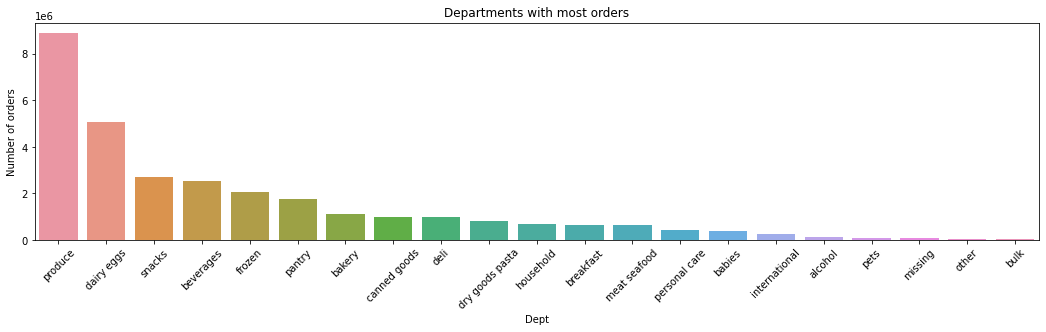

In [31]:
# Departments with most orders
plt.figure(figsize=(18,4))
sns.barplot(x=df_final['department'].value_counts().index, y=df_final['department'].value_counts().values)
plt.title("Departments with most orders")
plt.ylabel("Number of orders")
plt.xlabel("Dept")
plt.xticks(rotation=45)

Produce, Dairy eggs and Snacks are the top 3 departments in terms of number of orders received

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

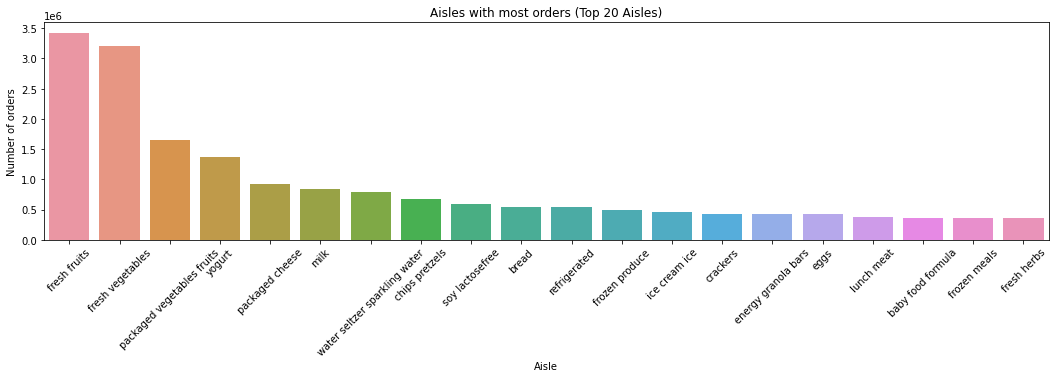

In [32]:
# Aisles with most orders (Top 20 aisles)
plt.figure(figsize=(18,4))
sns.barplot(x=df_final['aisle'].value_counts().head(20).index, y=df_final['aisle'].value_counts().head(20).values)
plt.title("Aisles with most orders (Top 20 Aisles)")
plt.ylabel("Number of orders")
plt.xlabel("Aisle")
plt.xticks(rotation=45)

Fresh fruits, Fresh vegetables and Packaged Vegetables Fruits are the top 3 aisles in terms of orders received

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

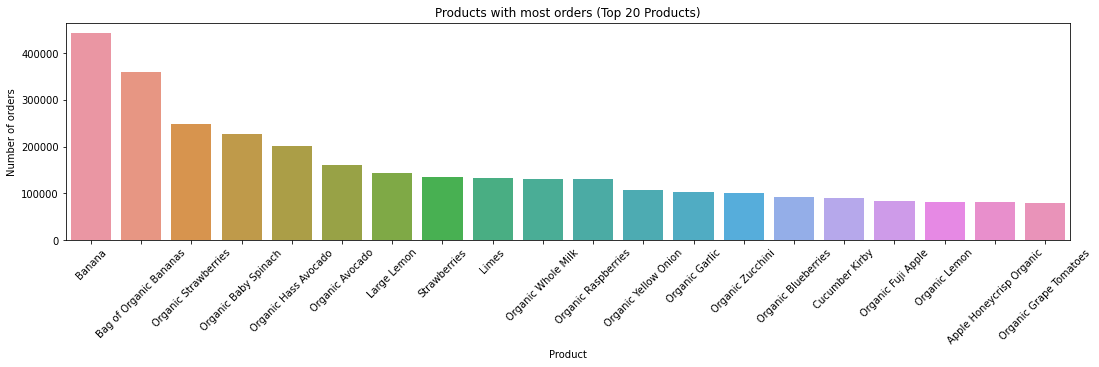

In [33]:
# Products with most orders (Top 20 products)
plt.figure(figsize=(18,4))
sns.barplot(x=df_final['product_name'].value_counts().head(20).index, y=df_final['product_name'].value_counts().head(20).values)
plt.title("Products with most orders (Top 20 Products)")
plt.ylabel("Number of orders")
plt.xlabel("Product")
plt.xticks(rotation=45)

Bananas, Bag of Organic Bananas and Organic Strawberries are the top 3 products in terms of orders received

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

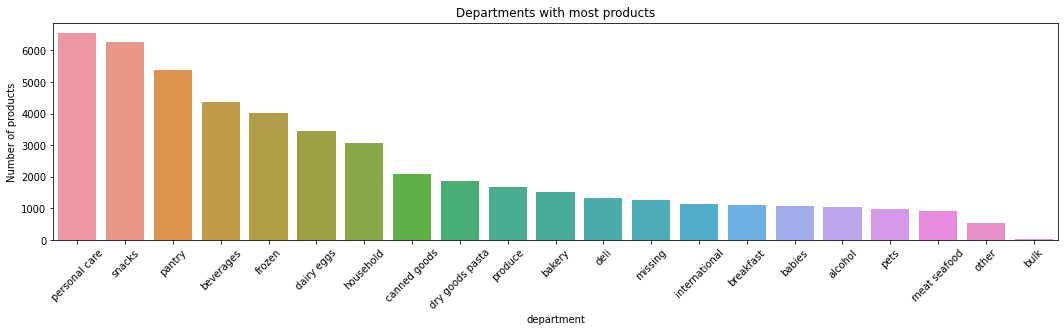

In [34]:
# Departments with most products
depts_most_products = df_final['product_name'].groupby(df_final['department']).nunique().sort_values(ascending=False)

plt.figure(figsize=(18,4))
sns.barplot(x= depts_most_products.index, y=depts_most_products.values)
plt.title("Departments with most products")
plt.ylabel("Number of products")
plt.xticks(rotation=45)

Personal Care, Snacks and Pantry are the top 3 departments in terms of number of products offered

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

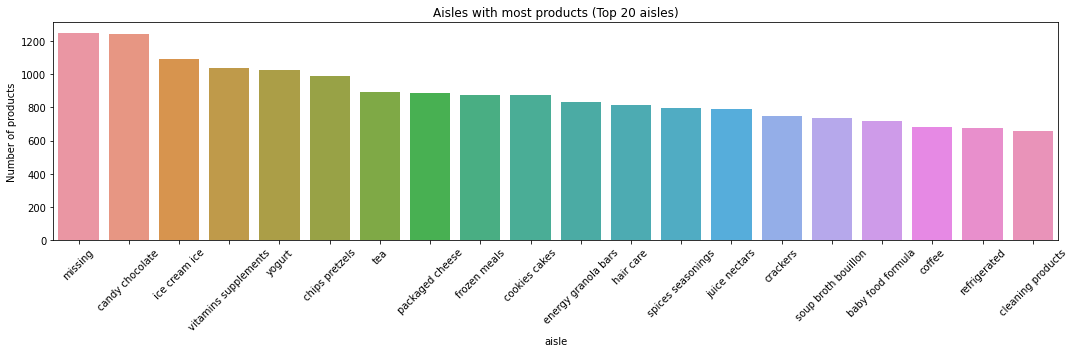

In [35]:
# Aisles with most products (Top 20 aisles)
aisles_most_products = df_final['product_name'].groupby(df_final['aisle']).nunique().sort_values(ascending=False).head(20)

plt.figure(figsize=(18,4))
sns.barplot(x=aisles_most_products.index, y=aisles_most_products.values)
plt.title("Aisles with most products (Top 20 aisles)")
plt.ylabel("Number of products")
plt.xticks(rotation=45)

Leave aside Missing (this would need to investigated with the help of business stakeholders).

Candy Chocolate, Ice cream ice and Vitamins supplments are the top 3 aisles in terms of number of products offered

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

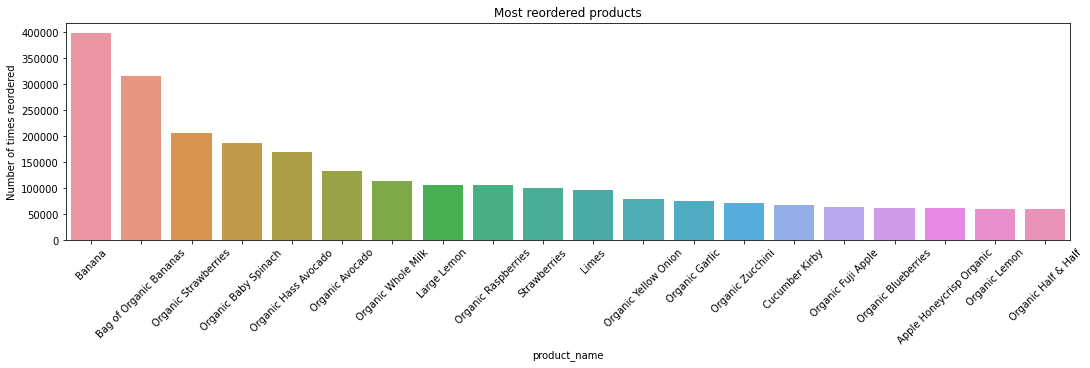

In [36]:
# Most reordered products
most_reordered_products = df_final['reordered'].groupby(df_final['product_name']).sum().sort_values(ascending=False)

plt.figure(figsize=(18,4))
sns.barplot(x=most_reordered_products.head(20).index, y=most_reordered_products.head(20).values)
plt.title("Most reordered products")
plt.ylabel("Number of times reordered")
plt.xticks(rotation=45)

Bananas, Bag of Organic Bananas and Organic Strawberries are the top 3 most reordered products

In [37]:
# Products that are added to cart first
products_added_to_cart_first = df_final['product_name'].groupby(df_final['add_to_cart_order']).value_counts()[1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

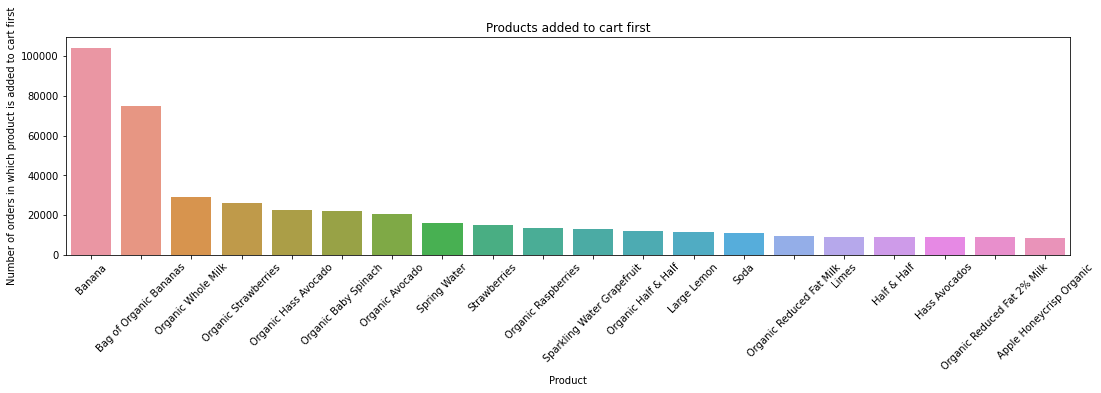

In [38]:
plt.figure(figsize=(18,4))
sns.barplot(x=products_added_to_cart_first.head(20).index, y=products_added_to_cart_first.head(20).values)
plt.title("Products added to cart first")
plt.ylabel("Number of orders in which product is added to cart first")
plt.xlabel("Product")
plt.xticks(rotation=45)

Bananas, Bag of Organic Bananas and Organic Whole Milk are the top 3 products that are added to cart first

Text(0.5, 1.0, 'Number of unique orders over course of week')

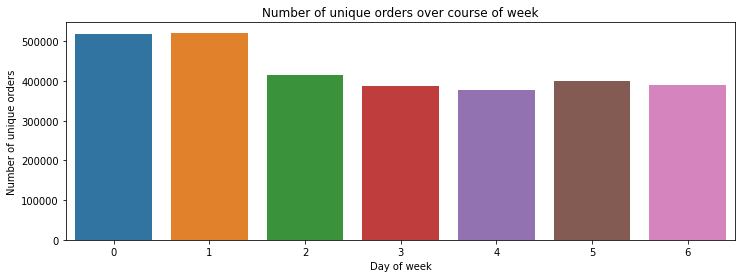

In [39]:
# How the orders are spread out over the course of week
plt.figure(figsize=(12,4))

unique_orders_over_week = df_final['order_id'].groupby(df_final['order_dow']).nunique()
sns.barplot(x=unique_orders_over_week.index, y=unique_orders_over_week.values)
plt.ylabel("Number of unique orders")
plt.xlabel("Day of week")
plt.title("Number of unique orders over course of week")


Days 0 and 1 (presumably Saturday and Sunday) get more orders than days 2,3,4,5 and 6

Text(0.5, 1.0, 'Number of unique orders over course of day')

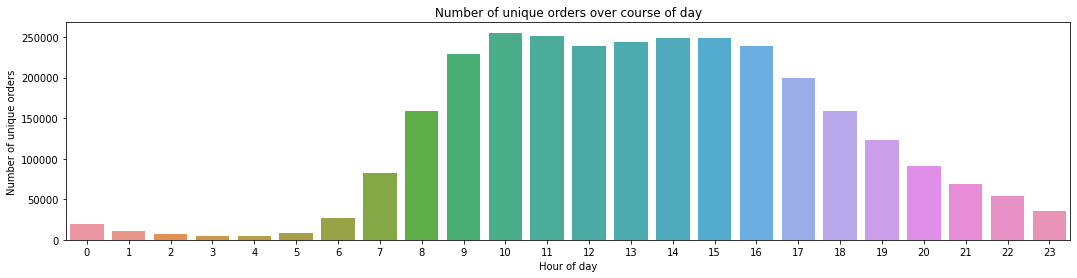

In [40]:
# How the orders are spread out over the course of day
plt.figure(figsize=(18,4))

unique_orders_over_day = df_final['order_id'].groupby(df_final['order_hour_of_day']).nunique()
sns.barplot(x=unique_orders_over_day.index, y=unique_orders_over_day.values)
plt.ylabel("Number of unique orders")
plt.xlabel("Hour of day")
plt.title("Number of unique orders over course of day")

Orders start to pick up around 6am in the morning, hit the peak around 10am, stays around the peak till about 4pm after which it starts to go down. 

Text(0.5, 1.0, 'Number of unique orders vs days since prior order')

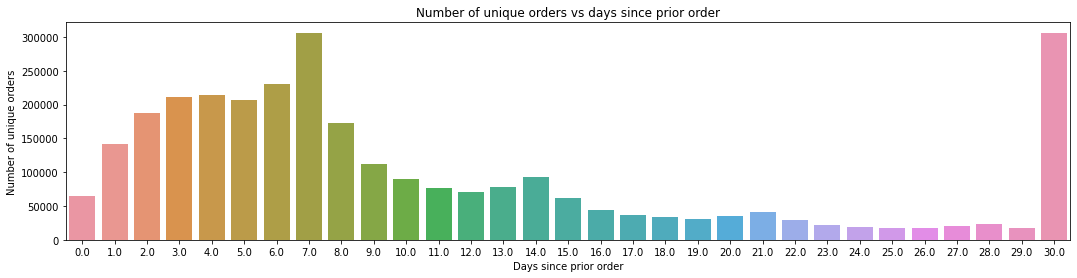

In [41]:
# How the orders are spread out since last/prior order
plt.figure(figsize=(18,4))

unique_orders_since_prior_order = df_final['order_id'].groupby(df_final['days_since_prior_order']).nunique()
sns.barplot(x=unique_orders_since_prior_order.index, y=unique_orders_since_prior_order.values)
plt.ylabel("Number of unique orders")
plt.xlabel("Days since prior order")
plt.title("Number of unique orders vs days since prior order")

There are 2 major peaks at 7 and 30. This indicates that there is one large segment of customers who order every week and there is another large segment of customers who order every month.

There is also large segment of customers who order every 1, 2,3,4,5 and 6 days as well. 

There is moderate segment of customers who order every 2 weeks (day 14) and every 3 weeks (day 21) as well. 

There is also a sizable segment of customers who order on the same day (day 0)

**Features selection and clustering**

In [42]:
# Now, pick set of features around which to cluster users (Start with order_dow, order_hour_of_day and days_since_prior_order from df_orders as set of features 
# to use. Chosen because they all represent the temporal behavior of the users which can potentially be a good way to cluster users. 

# Chose to use df_orders dataframe vs df_final dataframe because each row in df_orders represents a unique order whereas each row in df_final represents one product item of 
# a unique order out of multiple product items that could be in an order

A user has multiple orders. There are user behaviors associated with any order as identified by day of week order was submitted, hour of day order was submitted and days since prior order. User clustering will be performed by:

1. Clustering orders first
2. Then assigning the most frequent/dominant cluster label among the orders for that user to that user.




Text(0, 0.5, 'WCSS (within cluster sum of squares)')

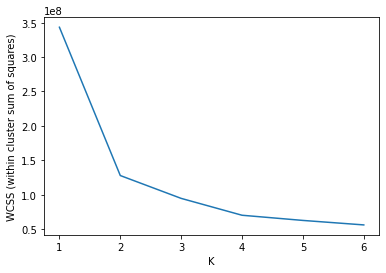

In [43]:
# Use KMeans clustering to cluster orders. Choose order_dow, order_hour_of_day and days_since_prior_order
# to use as temporal features for clustering orders. 

# Compute wcss (i.e. within cluster sum of squares) for 
# different values of K (i.e. number of clusters). Choose K value to use based on "elbow point".

from sklearn.cluster import KMeans

temporal_features = df_orders_clean[['order_dow','order_hour_of_day','days_since_prior_order']]

wcss = []
for k in range(1,7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(temporal_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,7),wcss)
plt.xlabel('K')
plt.ylabel('WCSS (within cluster sum of squares)')

Based on graph above, we can see that elbow point lies around K=4

In [44]:
# Choose K=4 and use KMeans to cluster orders into 4 segments. Look at how many orders are in each cluster.
from sklearn.cluster import KMeans
temporal_features = df_orders_clean[['order_dow','order_hour_of_day','days_since_prior_order']]

kmeans = KMeans(n_clusters=4)
temporal_features['cluster_order_id'] = kmeans.fit_predict(temporal_features)
temporal_features_clustered = temporal_features
temporal_features_clustered['user_id'] = df_orders_clean['user_id']
temporal_features_clustered['order_id'] = df_orders_clean['order_id']
temporal_features_clustered['cluster_order_id'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

2    1051022
0     978373
3     633316
1     552163
Name: cluster_order_id, dtype: int64

In [45]:
# Look at mean values for order_dow, order_hour_of_day and days_since_prior_order in each cluster
temporal_features_clustered_mean = temporal_features_clustered.groupby('cluster_order_id').aggregate({'order_dow':['min','mean','max'],'order_hour_of_day':['min','mean', 'max'],'days_since_prior_order':['min','mean','max']})
temporal_features_clustered_mean

order_dow            ... days_since_prior_order      
                       min      mean  ...                   mean   max
cluster_order_id                      ...                             
0                        0  2.841660  ...               5.016390  12.0
1                        0  2.720220  ...              28.445059  30.0
2                        0  2.789446  ...               5.308367  14.0
3                        0  2.709193  ...              15.062588  21.0

[4 rows x 9 columns]

From table above, the clusters differ from each other in the following ways:

i) **All clusters** have **similar mean** values for **order_dow**

ii)Two clusters have **similar mean** values for **order_hour_of_day** (around 13.5) but differ in **different mean** values for **days_since_prior_order**(one around 28, other around 15)

iii) Other two clusters have **similar mean** values for **days_since_prior_order** (around 5) but differ in **different mean** values for **order_hour_of_day** (one around 17, other around 9.9)


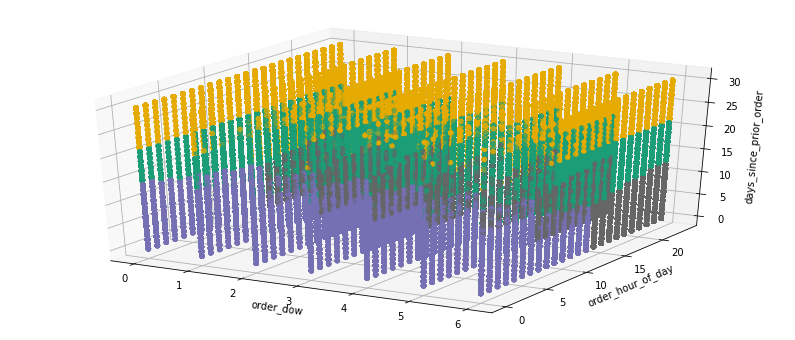

In [46]:
# Visualize the 4 clusters of orders in 3D plot
from matplotlib import cm

fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection='3d')

x = temporal_features_clustered['order_dow']
y = temporal_features_clustered['order_hour_of_day']
z = temporal_features_clustered['days_since_prior_order']
color = temporal_features_clustered['cluster_order_id']

ax.scatter3D(x, y, z, c=color, cmap=plt.cm.get_cmap('Dark2_r'))
ax.set_xlabel('order_dow')
ax.set_ylabel('order_hour_of_day')
ax.set_zlabel('days_since_prior_order')
plt.show()

The 3D plot above is little hard to interpret. So lets try with three separate 2D plots

In [47]:
# Visualize the 4 clusters/segments of orders in three 2D plots

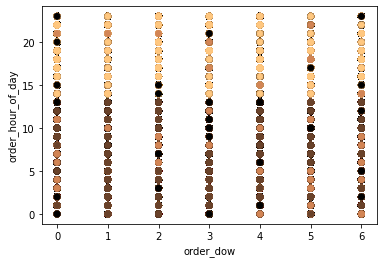

In [48]:
# order_hour_of_day vs order_dow
plt.scatter(temporal_features_clustered['order_dow'], temporal_features_clustered['order_hour_of_day'], c = temporal_features_clustered['cluster_order_id'], cmap = plt.cm.get_cmap('copper_r'))
plt.xlabel("order_dow")
plt.ylabel("order_hour_of_day")
plt.show()


The 2D plot above (order_hour_of_day vs over_dow) doesn't seem to do a clear segmentation of the clusters. 

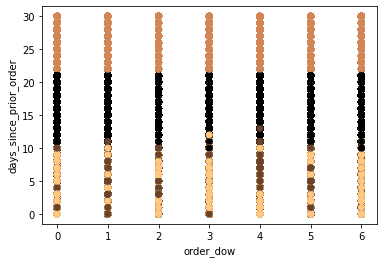

In [49]:
# days_since_prior_order vs order_dow
plt.scatter(temporal_features_clustered['order_dow'], temporal_features_clustered['days_since_prior_order'], c = temporal_features_clustered['cluster_order_id'], cmap = plt.cm.get_cmap('copper_r'))
plt.xlabel("order_dow")
plt.ylabel("days_since_prior_order")
plt.show()

In the 2D plot above (days_since_prior_order vs order_dow), we can see 2 separate clusters. The remaining 2 clusters appear little jumbled up. 

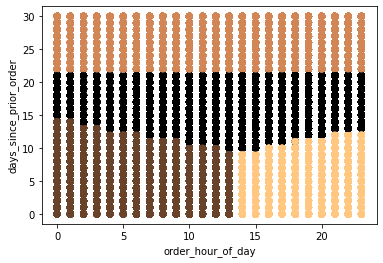

In [50]:
# days_since_prior_order vs order_hour_of_day
plt.scatter(temporal_features_clustered['order_hour_of_day'], temporal_features_clustered['days_since_prior_order'], c = temporal_features_clustered['cluster_order_id'], cmap = plt.cm.get_cmap('copper_r'))
plt.xlabel("order_hour_of_day")
plt.ylabel("days_since_prior_order")
plt.show()

The 2D plot above (days_since_prior_order vs order_hour_of_day) does a clear segmentation of the 4 clusters. Based on this, it appears that days_since_prior_order and order_hour_of_day are sufficient for clear segmentation of the clusters. order_dow is not as useful as the other two features. 

In [51]:
temporal_features_clustered.head()

,order_dow,order_hour_of_day,days_since_prior_order,cluster_order_id,user_id,order_id
1,3,7,15.0,3,1,2398795
2,3,12,21.0,3,1,473747
3,4,7,29.0,1,1,2254736
4,4,15,28.0,1,1,431534
5,2,7,19.0,3,1,3367565


In [52]:
# Now lets see how the cluster labels obtained for orders are distributed for first few users
temporal_features_clustered.cluster_order_id.groupby(temporal_features_clustered.user_id).value_counts().head(10)

user_id  cluster_order_id
1        3                   6
         1                   3
         0                   1
2        2                   6
         1                   5
         3                   3
3        3                   7
         0                   5
4        3                   3
         1                   1
Name: cluster_order_id, dtype: int64

From visual inspection above, we can see that each user has multiple cluster labels corresponding to their multiple orders. However, for each user, a specific cluster label tends to dominate (i.e. is most frequent) based on the value counts.  We will use this dominant cluster label as the "cluster label" for the users

In [53]:
# Find the dominant/most frequent cluster label for each user
cluster_user_id = temporal_features_clustered.cluster_order_id.groupby(temporal_features_clustered.user_id).value_counts().index
cluster_user_id

buffer = []
j = 1
for i in range(len(cluster_user_id)):
  if(cluster_user_id[i][0] == j):
    buffer.append(cluster_user_id[i])
    j = j + 1

buffer = pd.DataFrame(buffer)
buffer.rename(columns={0:'user_id',1:'dominant_cluster'}, inplace=True)
buffer.head()

,user_id,dominant_cluster
0,1,3
1,2,2
2,3,3
3,4,3
4,5,3
